### Exercise 12, Question 1
### Melissa Stephens and Janice Love

#### 1. The "chickwts.txt" dataset has two columns: chick weights and type of feed

In [13]:
# import packages
import numpy
import pandas
from scipy.optimize import minimize
from scipy.stats import norm
from plotnine import *

In [17]:
# load data
data=pandas.read_csv("chickwts.txt",sep=",")

In [18]:
# load data into dataframe
datain=pandas.DataFrame({"x":data.weight,"y":data.feed})

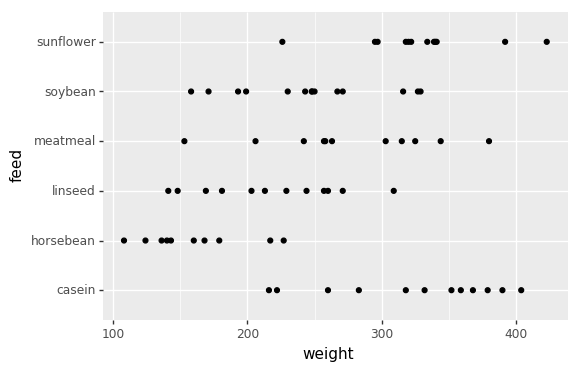

<ggplot: (291859677)>

In [21]:
# plot data 
a=ggplot(data,aes(x="weight",y="feed"))
a+geom_point()+coord_cartesian()

### Hypothesis
(1) the type of feed has no effect on chick weight (2) the type of feed affects the weight of the chick

### Likelihood ratio test

Need to define 2 custom functions. One for our T-test and one for the Null model

In [22]:
def nllike(p,obs):
        B0=p[0]
        B1=p[1]
        sigma=p[2]
        expected=B0+B1*obs.x
        nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
        return nll

In [23]:
def nllikeNull(p,obs):
        B0=p[0]
        expected=B0
        sigma=p[1]
        nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
        return nll

Use minimize to check whether paramers we guess are true